## POSTTEST 3 KB
TOMMY CANDRA GUNAWAN
2209106068
INFORMATIKA B1 2022

* Import Paket Pandas dan Membaca Dataset

Agar bisa menggunakan paket pandas kita perlu melakukan import paker terlebih dahulu, dan kita dapar mengimpor pandas sebagai pd agar lebih singkat.Setelah itu kita deklarasikan DataFrame (df) dengan pd.read_csv untuk membaca file csv agar lebih mudah dan efisien.

In [6]:
import pandas as pd
df = pd.read_csv("laptop_pricedataset.csv")
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split #untuk test split data
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# 1. Tampilkan rata-rata, standar deviasi, nilai minimum, nilai maksimum, Q1, Q2, dan Q3 dari attribute bertipe angka.
Untuk menampilkan perhitungan statistik terebut kita hanya perlu menggunakan df.describe(), maka akan memunculkan informasi statistik dari data dengan atribut angka. Tampilan berbentuk tabel yang berisi mean(rata-rata), std(standar deviasi), min(nilai minimum), max(nilai maksimum), 25% yang berarti kuartil bawah (Q1), 50% berarti kuartil tengah (Q2), dan 75% berarti kuartil atas (Q3).

In [7]:
df.describe()

,Inches,CPU_Frequency (GHz),RAM (GB),Weight (kg),Price (Euro)
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,2.302980,8.440784,2.040525,1134.969059
std,1.429470,0.503846,5.097809,0.669196,700.752504
min,10.100000,0.900000,2.000000,0.690000,174.000000
25%,14.000000,2.000000,4.000000,1.500000,609.000000
50%,15.600000,2.500000,8.000000,2.040000,989.000000
75%,15.600000,2.700000,8.000000,2.310000,1496.500000
max,18.400000,3.600000,64.000000,4.700000,6099.000000


# 2. Tampilkan 10 record pertama dari dataset dengan attribute bertipe angka
Untuk menampilkan 10 record pertama dari dataset dengan attribute bertipe angka kita perlu memilih dahulu atribut bertipe angka dengan select_dtypes number untuk data dengan tipe angka, kemudian .head(10) untuk menampilkan 10 record pertama.

In [8]:
df.select_dtypes(["number"]).head(10)

,Inches,CPU_Frequency (GHz),RAM (GB),Weight (kg),Price (Euro)
0,13.3,2.3,8,1.37,1339.69
1,13.3,1.8,8,1.34,898.94
2,15.6,2.5,8,1.86,575.00
3,15.4,2.7,16,1.83,2537.45
4,13.3,3.1,8,1.37,1803.60
5,15.6,3.0,4,2.10,400.00
6,15.4,2.2,16,2.04,2139.97
7,13.3,1.8,8,1.34,1158.70
8,14.0,1.8,16,1.30,1495.00
9,14.0,1.6,8,1.60,770.00


# 3. Tampilkan informasi jumlah record, jumlah attribute, nama attribute, jumlah attribute dengan tipe angka.
Kita diminta memasukkan informasi tersebut dalam dictionary dengan key sesuai nama informasinya dan menampilkan isi dari dictionary tersebut sebagus mungkin.
Pertama-tama kita deklarasikan beberapa variabel yang nantinya akan dimasukkan ke dalam dictionary. Untuk mengetahui jumlah record kita dapat menggunakan len(df), dan jika ingin mengetahui banyak atribut gunakan len(df.columns) yang akan menghitung panjang/banyak kolom. Kemudian untuk mengetahui nama semua atribut gunakan df.columns. Lalu untuk mengetahui jumlah atribut dengan tipe angka gunakan len lalu select_dtypes["number"].columns untuk memilih atribut dengan tipe angka.

In [9]:
jumlah_record = len(df)
jumlah_attribute = len(df.columns)
nama_attribute = list(df.columns)
attribute_angka = len(df.select_dtypes(["number"]).columns)

dict = {
    'Jumlah Record': jumlah_record,
    'Jumlah Attribute': jumlah_attribute,
    'Nama Attribute': nama_attribute,
    'Jumlah Attribute Tipe Angka': attribute_angka
}

print("======================================")
print("|          Informasi Dataset         |")
print("======================================")
for key, value in dict.items():
    if isinstance(value, int):
        print(f" {key} : {value} ")
    elif isinstance(value, list):
        i = 1
        print(f" {key} :")
        for item in value:
            print(f"  {i}. {item} ")
            i += 1
    print("--------------------------------------")

|          Informasi Dataset         |
 Jumlah Record : 1275 
--------------------------------------
 Jumlah Attribute : 15 
--------------------------------------
 Nama Attribute :
  1. Company 
  2. Product 
  3. TypeName 
  4. Inches 
  5. ScreenResolution 
  6. CPU_Company 
  7. CPU_Type 
  8. CPU_Frequency (GHz) 
  9. RAM (GB) 
  10. Memory 
  11. GPU_Company 
  12. GPU_Type 
  13. OpSys 
  14. Weight (kg) 
  15. Price (Euro) 
--------------------------------------
 Jumlah Attribute Tipe Angka : 5 
--------------------------------------


# 4. Tampilkan jumlah label dari semua attribute yang bernilai object (contoh : Jenis Kelamin, Agama).
Pertama kita harus memilih semua atribut dengan tipe object terlebih dahulu, yaitu dengan menggunakan select_dtypes["object"] kemudian diikuti dengan .value_counts() untuk mengetahui jumlah nilainya. Pada output kita dapat mengetahui jumlah kategori "Basic" adalah 8735 dan kategori "Luxury" adalah 1265.

In [10]:
df.select_dtypes(["object"]).value_counts()
# df["Location"].value_counts()

Company  Product            TypeName            ScreenResolution                 CPU_Company  CPU_Type                 Memory                GPU_Company  GPU_Type         OpSys     
Dell     Inspiron 5570      Notebook            Full HD 1920x1080                Intel        Core i5 8250U            256GB SSD             AMD          Radeon 530       Windows 10    3
                                                                                              Core i7 8550U            256GB SSD +  2TB HDD  AMD          Radeon 530       Windows 10    3
HP       EliteBook x360     2 in 1 Convertible  Full HD / Touchscreen 1920x1080  Intel        Core i5 7200U            256GB SSD             Intel        HD Graphics 620  Windows 10    3
Dell     Inspiron 5570      Notebook            Full HD 1920x1080                Intel        Core i5 8250U            128GB SSD +  1TB HDD  AMD          Radeon 530       Windows 10    2
         Latitude 7280      Ultrabook           Full HD 1920x1080     

# 5. Visualisasikan Dataset dengan Salah Satu Grafik
Pada langkah ini, kita akan memvisualisasikan data dari dataset menggunakan grafik. Grafik yang dipilih harus sesuai dengan jenis data yang ada dan tujuan analisis. Misalnya, jika kita ingin melihat distribusi kategori dalam dataset, grafik batang atau histogram mungkin cocok. Jika kita ingin menunjukkan hubungan antara dua variabel numerik, grafik scatter plot bisa menjadi pilihan.

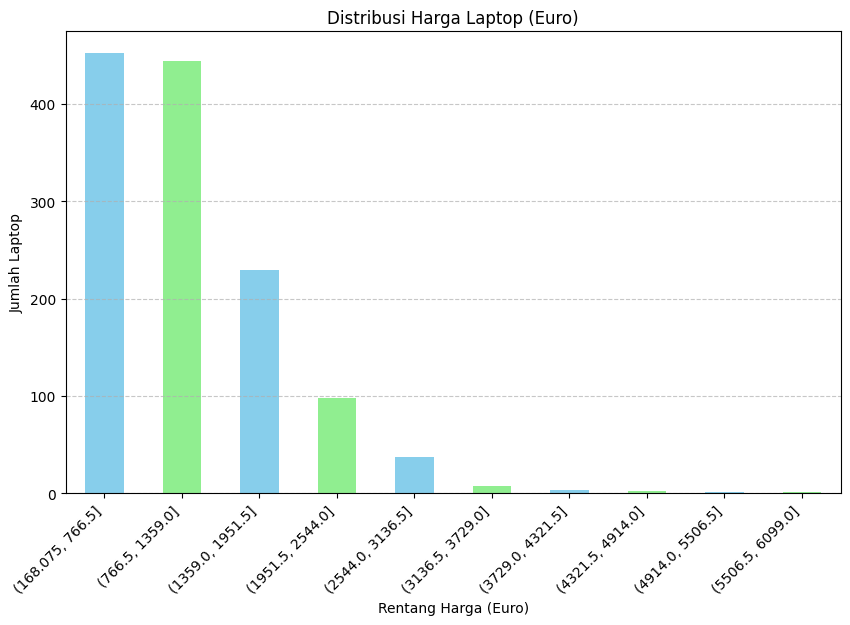

In [11]:
# # Plot bar chart untuk distribusi 'price (euro)'
# plt.figure(figsize=(8, 6))
# df['price (euro)'].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen'])
# plt.title('Distribusi Accommodation Available')
# plt.xlabel('Accommodation Available')
# plt.ylabel('Jumlah')
# plt.xticks(rotation=0)
# plt.show()

# Create bins for the 'Price (Euro)' column
bins = pd.cut(df['Price (Euro)'], bins=10)

# Plot a bar chart for the distribution of price ranges
plt.figure(figsize=(10, 6))
bins.value_counts().sort_index().plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Distribusi Harga Laptop (Euro)')
plt.xlabel('Rentang Harga (Euro)')
plt.ylabel('Jumlah Laptop')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# 6. Tampilkan Korelasi Dataset Menggunakan Heatmap
Pada langkah ini, kita akan menghitung dan menampilkan matriks korelasi dari dataset menggunakan heatmap. Korelasi menunjukkan hubungan antara variabel-variabel numerik dalam dataset. Heatmap adalah cara visual yang efektif untuk menunjukkan kekuatan dan arah hubungan antara variabel.

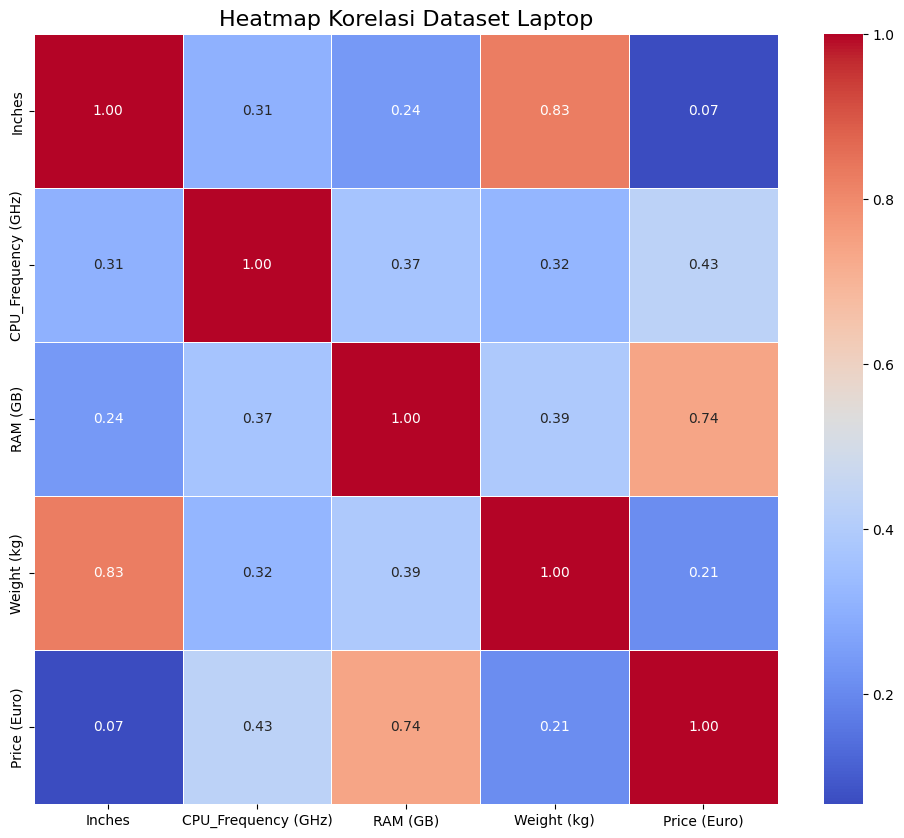

In [12]:

# df['Accommodation_Available'] = df['Accommodation_Available'].astype('category').cat.codes

# df_encoded = pd.get_dummies(df)

# numerical_df = df_encoded.select_dtypes(include=['float64', 'int64'])

# corr_matrix = numerical_df.corr()

# plt.figure(figsize=(12, 10))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
# plt.title('Heatmap Korelasi Dataset dengan Fokus pada Accommodation Available', fontsize=16)
# plt.show()

# Encoding categorical variables
df['Company'] = df['Company'].astype('category').cat.codes
df['TypeName'] = df['TypeName'].astype('category').cat.codes
df['ScreenResolution'] = df['ScreenResolution'].astype('category').cat.codes
df['CPU_Company'] = df['CPU_Company'].astype('category').cat.codes
df['CPU_Type'] = df['CPU_Type'].astype('category').cat.codes
df['GPU_Company'] = df['GPU_Company'].astype('category').cat.codes
df['GPU_Type'] = df['GPU_Type'].astype('category').cat.codes
df['OpSys'] = df['OpSys'].astype('category').cat.codes

# Creating an encoded dataframe with numerical variables only
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numerical_df.corr()

# Plotting the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Heatmap Korelasi Dataset Laptop', fontsize=16)
plt.show()


### Kesimpulan

1. **Distribusi Accommodation Available**:
   Grafik batang menunjukkan distribusi jumlah akomodasi yang tersedia dalam dataset. Dengan visualisasi ini, kita dapat melihat frekuensi dari setiap kategori akomodasi, yang membantu memahami pola prevalensi dan popularitas akomodasi di antara para wisatawan.

2. **Heatmap Korelasi**:
   Heatmap korelasi memberikan gambaran tentang hubungan antara variabel numerik dalam dataset. Korelasi positif menunjukkan bahwa variabel-variabel tersebut bergerak dalam arah yang sama, sementara korelasi negatif menunjukkan bahwa variabel-variabel tersebut bergerak dalam arah yang berlawanan. Misalnya, jika terdapat korelasi tinggi antara variabel **"biaya perjalanan"** dan **"durasi perjalanan"**, ini mungkin menunjukkan bahwa biaya perjalanan lebih tinggi pada perjalanan yang lebih lama.


## 1. Data Cleaning  
Data Cleaning adalah proses mempersiapkan data untuk analisis dengan menghapus atau memodifikasi data yang tidak benar, tidak lengkap, tidak relevan, diduplikasi, atau diformat dengan tidak benar.


### cek data dengan nilai null (handling missing value)
Pada bagian ini saya akan menangani nilai null dengan melakukan subsitusi nilai. Langkah pertama kita perlu mengimport SimpleImputer dari sklearn.impute terlebih dahulu. Dan mengecek nilai NULL pada data.

In [13]:
df.isnull().sum()

Company                0
Product                0
TypeName               0
Inches                 0
ScreenResolution       0
CPU_Company            0
CPU_Type               0
CPU_Frequency (GHz)    0
RAM (GB)               0
Memory                 0
GPU_Company            0
GPU_Type               0
OpSys                  0
Weight (kg)            0
Price (Euro)           0
dtype: int64

### DUPLICATE
Tahap pertama kita akan mengecek data yang duplikat dengan df.duplicated().sum() yang akan menghitung berapa banyak data yang duplikat.

In [14]:
duplicate = df.duplicated().sum()
print('Jumlah nilai duplikat: ', duplicate)

Jumlah nilai duplikat:  0



### Handling Outer Values dengan Boxplot

Dalam analisis data, **outlier** adalah nilai-nilai yang sangat jauh dari distribusi data lainnya. Boxplot adalah alat yang sangat berguna untuk mengidentifikasi outlier, karena visualisasi ini menampilkan persebaran data secara ringkas, termasuk median, kuartil, dan outlier.

c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='Price (Euro)'>

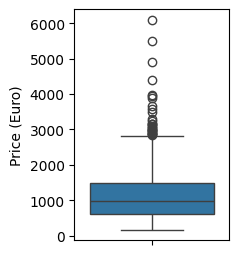

In [15]:
fig, ax = plt.subplots(figsize=(2,3)) #buat frame/figure
sns.boxplot(df['Price (Euro)']) #buat boxplot

membuat perbandingan sebelum dan sesudah handling oulier dengan kode seperti dibawah ini

c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


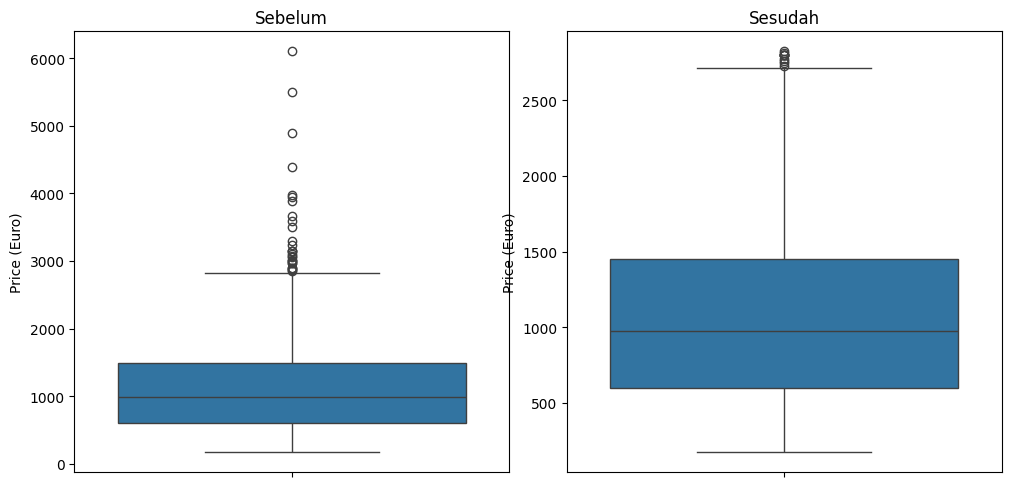

In [16]:
fig, axes = plt.subplots(1,2, figsize=(10, 5))
plt.tight_layout()
sns.boxplot(df['Price (Euro)'],orient='v',ax=axes[0])
axes[0].title.set_text("Sebelum")

# Menangani outlier dengan IQR
Q1 = df['Price (Euro)'].quantile(0.25)
Q3 = df['Price (Euro)'].quantile(0.75)
IQR = Q3 - Q1

#ambil nilai antara 1.5*IQR dari Q1 dan Q3 aja
df['Price (Euro)'] = df['Price (Euro)'][~((df['Price (Euro)'] < (Q1 - 1.5 * IQR)) |
(df['Price (Euro)'] > (Q3 + 1.5 * IQR)))]
#setelah handling oulier
sns.boxplot(df['Price (Euro)'],orient='v',ax=axes[1])
axes[1].title.set_text("Sesudah")
plt.show()

## 2. Normalisasi/standarisasi kolom numerik


### Normalisasi
Pada bagian ini kita menggunakan teknik penskalaan standarisasi sehingga memiliki dimensi [0, 1]
Pertama-tama kita import MinMaxScaler terlebih dahulu dari sklearn.preprocessing. Kemudian kita akan mengecek tipe data dari tiap kolom. Lalu kita deklrasikan mm dengan value MinMaxScaler(). Selanjutnya, kita akan mengcopy dataset terlebih dahulu.

In [17]:
df.dtypes

Company                   int8
Product                 object
TypeName                  int8
Inches                 float64
ScreenResolution          int8
CPU_Company               int8
CPU_Type                  int8
CPU_Frequency (GHz)    float64
RAM (GB)                 int64
Memory                  object
GPU_Company               int8
GPU_Type                  int8
OpSys                     int8
Weight (kg)            float64
Price (Euro)           float64
dtype: object

In [18]:
#Menginisialisasi Min Max Scaller
scaler = MinMaxScaler(feature_range=(0,1))
#Numerical Columns
num_col_ = [col for col in df.columns if
  df[col].dtypes != 'O' and col != 'Id']
x1 = df[num_col_]
#Mempelajari prameter statistik untuk setiap data dan ditransformasikan
x1 = scaler.fit_transform(x1)
x1 = pd.DataFrame(x1, columns=num_col_)
x1.head()

,Company,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,0.055556,0.8,0.385542,0.589744,0.5,0.434783,0.518519,0.096774,0.666667,0.533333,1.0,0.169576,0.439883
1,0.055556,0.8,0.385542,0.025641,0.5,0.434783,0.333333,0.096774,0.666667,0.476190,1.0,0.162095,0.273562
2,0.388889,0.6,0.662651,0.205128,0.5,0.500000,0.592593,0.096774,0.666667,0.495238,0.5,0.291771,0.151321
3,0.055556,0.8,0.638554,0.641026,0.5,0.586957,0.666667,0.225806,0.000000,0.723810,1.0,0.284289,0.891868
4,0.055556,0.8,0.385542,0.589744,0.5,0.434783,0.814815,0.096774,0.666667,0.542857,1.0,0.169576,0.614943


### Standarisasi


Standarisasi Data: Menggunakan StandardScaler untuk Normalisasi Fitur Numerik
Dalam proses machine learning, salah satu teknik penting yang sering digunakan adalah standarisasi data. Standarisasi bertujuan untuk mengubah distribusi fitur agar memiliki mean (rata-rata) 0 dan standar deviasi 1, sehingga model machine learning dapat bekerja lebih baik, terutama untuk algoritma yang sensitif terhadap skala fitur (seperti regresi linear atau SVM).

In [19]:
#Menginisialisasi Min Max Scaller
scaler = StandardScaler()
#Numerical Columns
num_col_ = [col for col in df.columns if
  df[col].dtypes != 'O' and col != 'Id']
x1 = df[num_col_]
#Mempelajari prameter statistik untuk setiap data dan ditransformasikan
x1 = scaler.fit_transform(x1)
x1 = pd.DataFrame(x1, columns=num_col_)
x1.head()

,Company,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,-1.333546,1.136135,-1.205746,1.737738,0.216459,-0.603861,-0.005918,-0.086499,-0.039845,0.335039,3.081382,-1.002380,0.430647
1,-1.333546,1.136135,-1.205746,-1.056229,0.216459,-0.603861,-0.998674,-0.086499,-0.039845,0.104487,3.081382,-1.047227,-0.305492
2,0.131784,0.334490,0.403873,-0.167240,0.216459,-0.250415,0.391185,-0.086499,-0.039845,0.181337,-0.787414,-0.269871,-0.846535
3,-1.333546,1.136135,0.263906,1.991735,0.216459,0.220846,0.788288,1.483418,-2.201665,1.103545,3.081382,-0.314718,2.431142
4,-1.333546,1.136135,-1.205746,1.737738,0.216459,-0.603861,1.582493,-0.086499,-0.039845,0.373464,3.081382,-1.002380,1.205468


Proses standarisasi ini penting untuk membuat fitur numerik berada pada skala yang sama, sehingga model machine learning dapat mempelajari data dengan lebih optimal.

# 3. Encoding

### one hot encoding
Untuk melakukan One-Hot Encoding kita perlu mengimport OneHotEncoder dari sklearn.preprocessing terlebih dahulu. Pada bagian ini kita akan mengubah nilai 'hasPool' menjadi boolean (True, False).

In [20]:
ohe = OneHotEncoder(sparse_output=False)
oh_encoded = ohe.fit_transform(df[['RAM (GB)']]) 
categories = ohe.categories_[0]

encoded = pd.DataFrame(oh_encoded, columns=[f'RAM_{int(cat)}GB' for cat in categories])
encoded

,RAM_2GB,RAM_4GB,RAM_6GB,RAM_8GB,RAM_12GB,RAM_16GB,RAM_24GB,RAM_32GB,RAM_64GB
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1270,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1271,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1272,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1273,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


 ### Ordinal Encoding
Untuk melakukan ordinal encoding kita perlu mengimport OrdinalEncoder dari sklearn.preprocessing terlebih dahulu. Pada bagian ini kita akan mengubah nilai category menjadi bilangan bulat.

Pertama kita deklarasikan OrdinalEncoder() dengan oe. Kemudian kita deklarasikan df 'TypeName' dengan value OrdinalEncoder dari df 'TypeName'.

In [21]:
oe = OrdinalEncoder()
df[['TypeName']] = oe.fit_transform(df[['TypeName']])
df['TypeName'].unique() 


array([4., 3., 2., 1., 0., 5.])

In [22]:
df['TypeName'].value_counts()

TypeName
3.0    707
1.0    205
4.0    194
0.0    117
5.0     29
2.0     23
Name: count, dtype: int64

# 4. Feature engineering (minimal 1 feature baru)

Dalam proses Feature Engineering, kita sering kali melakukan transformasi atau manipulasi data untuk menciptakan fitur baru yang lebih informatif bagi model machine learning. Salah satu metode yang sering digunakan adalah dengan membagi data numerik menjadi kategori (binned categories). Berikut adalah langkah-langkah untuk membuat kategori baru berdasarkan kolom TypeName menggunakan metode binning.

In [23]:
data = {
    'TypeName': [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
}
df = pd.DataFrame(data)

# Membuat kategori typename
# Ubah bins untuk memiliki 6 titik batas
bins = [-1, 0, 1, 2, 3, 4, 5]  # Batas bin
# Pastikan ada 5 label untuk 6 batas
labels = ['Unknown', 'Notebook', 'Ultrabook', 'Netbook', 'Gaming', '2 in 1 Convertible']

# Menambahkan kolom TypeName_Group
df['TypeName_Group'] = pd.cut(df['TypeName'], bins=bins, labels=labels, right=True, include_lowest=True)

# Lihat hasilnya
print(df)

# Menampilkan frekuensi setiap kategori
print("\nFrekuensi setiap kategori:")
print(df['TypeName_Group'].value_counts())


   TypeName      TypeName_Group
0       0.0             Unknown
1       1.0            Notebook
2       2.0           Ultrabook
3       3.0             Netbook
4       4.0              Gaming
5       5.0  2 in 1 Convertible

Frekuensi setiap kategori:
TypeName_Group
Unknown               1
Notebook              1
Ultrabook             1
Netbook               1
Gaming                1
2 in 1 Convertible    1
Name: count, dtype: int64


Proses ini mengubah data numerik TypeName menjadi kategori yang lebih bermakna bagi analisis atau model machine learning. Kategori ini membantu model untuk lebih mudah memahami hubungan antara tipe laptop dan variabel target, seperti harga atau performa.

# 5. Splitting data ke dalam data training & data testing

### Bagi Training set dan Testing set dengan perbandingan 80 : 20
pada bagian ini saya membagi dataset menjadi training set dan testing set dengan proporsi 80 : 20 dengan menggunakan test_size = 0.2

In [24]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [29]:
print("Dimensi X_train :", X_train.shape)
print("Dimensi X_test  :", X_test.shape)
print("Dimensi Y_train :", Y_train.shape)
print("Dimensi Y_test  :", Y_test.shape)

Dimensi X_train : (4, 1)
Dimensi X_test  : (2, 1)
Dimensi Y_train : (4,)
Dimensi Y_test  : (2,)


- X_train : Untuk menampung data source yang akan dilatih.
- X_test : Untuk menampung data target yang akan dilatih.
- Y_train : Untuk menampung data source yang akan digunakan untuk testing.
- Y_test : Untuk menampung data target yang akan digunakan untuk testing.
- test_size : Mendefinisikan ukuran testing set (0.2 = 20% dari seluruh dataset) dan ukuran train set akan otomatis 0.8 atau 80% dari seluruh dataset
random_state pada fungsi seperti train_test_split digunakan untuk memastikan bahwa pemisahan data dilakukan secara konsisten setiap kali kode dijalankan.